In [2]:
import matplotlib.pyplot as plt
import re
import numpy as np

In [194]:
def extract_floats(s):
    # Regular expression for matching floats
    pattern = r"[-+]?[0-9]*\.?[0-9]+"
    # Find all matches in the string
    matches = re.findall(pattern, s)
    # Convert all matches to float
    floats = [float(match) for match in matches]
    return floats

In [200]:
def read_file(file_path, results):
    with open(file_path, "r") as file:
        lines = file.readlines()
        for line in lines:
            if "Data ratio" in line:
                # Get the value after ":"
                line = line.split(":")[2].strip()
                data_ratio = extract_floats(line.split(",")[0].strip())[0]
                data_volume = extract_floats(line.split(",")[1].strip())[0]
                accuracy = extract_floats(line.split(",")[3].strip())[0]
                if data_volume not in results:
                    results[data_volume] = [accuracy]
                else:
                    results[data_volume].append(accuracy)
        return results

In [227]:
model_name = 'moco-v2'

In [228]:
file_directory = "../../logs/ssl/admm-lda/"
source = 'cifar10'
target = 'stl'
seeds = [1, 2, 3, 4, 5]
ntp = {}
for s in seeds:
    org_path = file_directory + f"{model_name}/{s}/admm_" + source + "_to_" + target + ".log"
    org_dic = read_file(org_path, ntp)
print(ntp)

{5.0: [0.169375, 0.177125, 0.146625, 0.1575, 0.134875], 10.0: [0.16575, 0.118875, 0.174875, 0.162625, 0.19375], 25.0: [0.322875, 0.277, 0.26025, 0.142625, 0.231875], 40.0: [0.32775, 0.27625, 0.247375, 0.290125, 0.27375], 50.0: [0.29475, 0.2585, 0.257, 0.259625, 0.27175], 250.0: [0.421, 0.33775, 0.33925, 0.318625, 0.3205], 500.0: [0.452125, 0.344625, 0.32325, 0.349125, 0.358625], 1000.0: [0.6185, 0.49425, 0.49325, 0.4845, 0.475875], 2500.0: [0.686625, 0.589, 0.604, 0.599625, 0.609125], 5000.0: [0.71325, 0.620125, 0.664625, 0.657875, 0.6565]}


In [229]:
file_directory = "../../logs/ssl/original/"
source = 'cifar10'
target = 'stl'

org = {}
for s in seeds:
    org_path = file_directory + f"{model_name}/{s}/admm_" + source + "_to_" + target + ".log"
    org_dic = read_file(org_path, org)
print(org)

{5.0: [0.12725, 0.183, 0.127375, 0.130375, 0.111, 0.13625, 0.115375, 0.18625, 0.128875, 0.1715], 10.0: [0.172625, 0.1925, 0.171875, 0.153125, 0.155375, 0.174625, 0.152125, 0.1675, 0.159625, 0.15675], 25.0: [0.24175, 0.249875, 0.246375, 0.24875, 0.234875, 0.254625, 0.243375, 0.259625, 0.245375, 0.252875], 40.0: [0.280375, 0.3165, 0.304625, 0.322125, 0.292375, 0.32425, 0.308, 0.31925, 0.2985, 0.31875], 50.0: [0.32325, 0.326375, 0.323375, 0.336, 0.329, 0.298125, 0.320875, 0.3295, 0.318375, 0.314125], 250.0: [0.48025, 0.495375, 0.450125, 0.506375, 0.46675, 0.48525, 0.4835, 0.489375, 0.486125, 0.505375], 500.0: [0.544, 0.5285, 0.526875, 0.50475, 0.532125, 0.522875, 0.533, 0.522375, 0.51725, 0.517], 1000.0: [0.599125, 0.603875, 0.62175, 0.60125, 0.60875, 0.600875, 0.594375, 0.589625, 0.606125, 0.59325], 2500.0: [0.676875, 0.6735, 0.677625, 0.6805, 0.673, 0.678125, 0.679, 0.681125, 0.670625, 0.66925], 5000.0: [0.69525, 0.694, 0.705125, 0.70125, 0.708375, 0.69825, 0.704125, 0.700625, 0.720875,

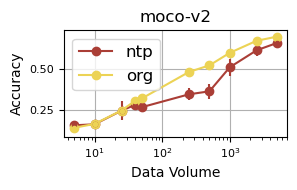

In [230]:
colors = ['#aa3e36', '#ecd355', '#2ca02c', '#d62728', '#9467bd']
figure = plt.figure(figsize=(3, 2))
std = np.std(list(ntp.values()), axis=1)
mean = np.mean(list(ntp.values()), axis=1)
# Set color mapping
cmap = plt.get_cmap('tab10')
plt.plot(list(ntp.keys()), mean, label=f"ntp", color=colors[0], marker="o")
# Draw the std using the bars
plt.errorbar(list(ntp.keys()), mean, yerr=std, fmt='.', color=colors[0])

std = np.std(list(org.values()), axis=1)
mean = np.mean(list(org.values()), axis=1)
# Set color mapping
cmap = plt.get_cmap('tab10')
plt.plot(list(org.keys()), mean, label=f"org", color=colors[1], marker="o")
# Draw the std using the bars
plt.errorbar(list(org.keys()), mean, yerr=std, fmt='.', color=colors[1])

# Set the text size 
plt.xlabel("Data Volume")
plt.ylabel("Accuracy")

# set fontsize 
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.grid(True)

# Set the x-axis to a log scale
plt.xscale('log')
plt.title(model_name)
plt.legend()
# Set the fontsize for labels 
plt.legend(fontsize=12)
# save figure in svg
plt.tight_layout()
plt.savefig(f"../../imgs/ntp_vs_org_{model_name}.jpeg", format="jpeg", dpi=1200)